<a href="https://colab.research.google.com/github/microprediction/nba/blob/main/basketball_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall numpy -y

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Successfully uninstalled numpy-1.19.5


In [ ]:
!pip install pycaret

# Basketball Team Statistics
Here we have a bit of fun looking at what helps teams win games. In the first stage the idea is to look at one game at a time, and the importance of a few (contemporaneous) key statistics in determining the final score. 

In [63]:
URL = 'https://raw.githubusercontent.com/microprediction/nba/main/data/games.csv'
import pandas as pd
games = pd.read_csv(URL)
games.columns

Index(['Unnamed: 0', 'SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
       'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

Fix the darn field goal percentages, as this currently commingle three point shots and two point shots (why do they do this???)

In [64]:
games['FGA'] = games['FGA'] - games['FG3A']
games['FGM'] = games['FGM'] - games['FG3M']
games['FG_PCT'] = games['FGM']/games['FGA']
games[['FG3_PCT','FG_PCT','FT_PCT']].mean()

FG3_PCT    0.337872
FG_PCT     0.487729
FT_PCT     0.754757
dtype: float64

In [65]:
games[['FGA','FG3A','FTA']].mean()

FGA     66.457381
FG3A    16.677051
FTA     25.534462
dtype: float64

For interpretability we'll scale field goal percentages by typical points on offer in a game. 

In [66]:
rescaling = zip(['FG_PCT','FG3_PCT','FT_PCT'],[66.45*2,16.67*3,25.53])

In [67]:
for col,multi in rescaling:
   games[col.replace('_PCT','_SCALED')]=games[col]*multi


In [68]:
need = ['FG_SCALED', 'FG3_SCALED','FT_SCALED', 'OREB', 'DREB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PTS']
games = games[need]
len(games)

98327

In [69]:
test_data = games[-10000:]
train_data = games[:-10000]

In [70]:
from pycaret.regression import *

In [71]:
experiment = setup(data = train_data, target = 'PTS', session_id=99)

,Description,Value
0,session_id,99
1,Target,PTS
2,Original Data,"(88327, 11)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(61828, 10)"


In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,5.6514,51.3527,7.1658,0.7286,0.0730,0.0567,0.578
gbr,Gradient Boosting Regressor,5.8964,55.7206,7.4643,0.7055,0.0759,0.0591,5.480
ridge,Ridge Regression,5.9021,55.9229,7.4778,0.7045,0.0805,0.0597,0.043
lar,Least Angle Regression,5.9021,55.9229,7.4778,0.7045,0.0805,0.0597,0.045
br,Bayesian Ridge,5.9021,55.9229,7.4778,0.7045,0.0805,0.0597,0.062
lr,Linear Regression,5.9021,55.9229,7.4778,0.7045,0.0805,0.0597,0.464
huber,Huber Regressor,5.8946,56.0125,7.4838,0.7040,0.0805,0.0595,1.141
en,Elastic Net,5.9379,56.5597,7.5203,0.7011,0.0813,0.0602,0.047
rf,Random Forest Regressor,5.9338,56.6333,7.5252,0.7007,0.0782,0.0603,33.211
lasso,Lasso Regression,5.9494,56.7943,7.5359,0.6999,0.0815,0.0604,0.044


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=99, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Pick one and re-fit it

In [72]:
gbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.6898,51.7040,7.1905,0.7315,0.0792,0.0574
1,5.5742,50.4530,7.1030,0.7378,0.0785,0.0561
2,5.7161,52.8778,7.2717,0.7223,0.0709,0.0568
3,5.6328,51.8924,7.2036,0.7354,0.0783,0.0594
4,5.6264,50.8125,7.1283,0.7251,0.0697,0.0559
5,5.6943,52.7056,7.2599,0.7193,0.0711,0.0568
6,5.6392,51.9578,7.2082,0.7254,0.0725,0.0565
7,5.6912,51.3226,7.1640,0.7272,0.0702,0.0566
8,5.5558,49.8865,7.0630,0.7293,0.0692,0.0554
9,5.6331,51.1209,7.1499,0.7266,0.0729,0.0562


In [ ]:
!pip install shap

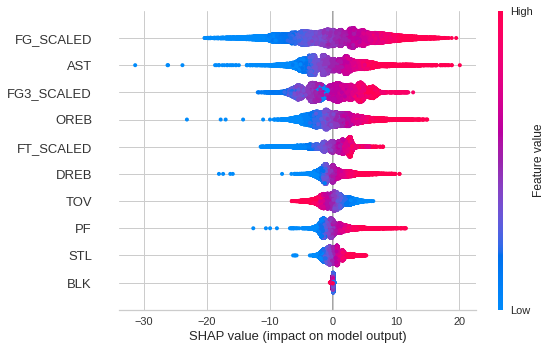

In [73]:
interpret_model(gbm_model)

... or a simple model

In [74]:
linear_model = create_model('lr')
tuned_linear_model = tune_model(linear_model)
tuned_linear_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.1833,61.1847,7.8221,0.6823,0.0959,0.0630
1,6.0941,60.7134,7.7919,0.6845,0.1004,0.0641
2,6.1936,61.7311,7.8569,0.6758,0.0767,0.0616
3,6.1333,62.4064,7.8998,0.6817,0.0886,0.0692
4,6.1287,60.2748,7.7637,0.6739,0.0762,0.0611
5,6.1619,61.4605,7.8397,0.6726,0.0768,0.0615
6,6.0967,60.7642,7.7951,0.6788,0.0771,0.0608
7,6.1579,60.4438,7.7746,0.6787,0.0762,0.0613
8,6.0701,59.1021,7.6878,0.6793,0.0755,0.0605
9,6.0954,59.5279,7.7154,0.6817,0.0921,0.0611


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

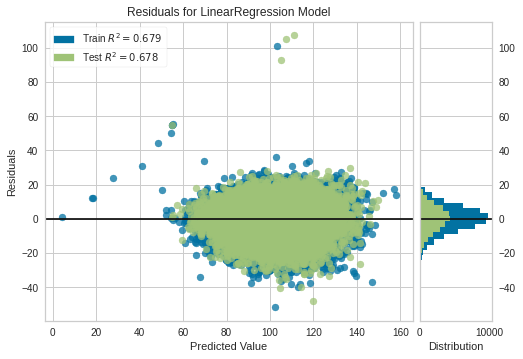

In [75]:
plot_model(linear_model)

In [76]:
final_tuned_linear_model = finalize_model(tuned_linear_model)
final_tuned_linear_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [77]:
unseen = predict_model(final_tuned_linear_model,data=test_data)
(unseen['Label']-unseen['PTS']).std()

7.68380178546868

In [78]:
print(list(zip(final_tuned_linear_model.coef_,need[:-1]+['const'])))

[(0.80788237, 'FG_SCALED'), (0.4192402, 'FG3_SCALED'), (1.0501705, 'FT_SCALED'), (0.93114495, 'OREB'), (0.40593585, 'DREB'), (0.69978327, 'AST'), (0.50869644, 'STL'), (-0.028841702, 'BLK'), (-0.48521018, 'TOV'), (0.47805905, 'PF')]


So now, how do you explain the extremely low coefficient assigned to the three-point shooting percentage? Is it because failed three-point shots are rebounded more often? The difference between offensive and defensive rebounding is also interesting. And blocks don't seem to matter at all! Fouling is good. 
